# Machine Characteristics

Machine characteristics such as speed, torque, voltage, currents, frequency etc. can be efficientliy calculated by equivalent circuit models which are included in the module 'femagtools.machine':

In [1]:
import femagtools.machine
p = 4
r1 = 0.0806
ls = 0.0
ld = [0.0014522728, 0.0014522728]
lq = [0.0038278836, 0.0032154]
psim = [0.11171972, 0.11171972]
i1 = [80.0]
beta = [-41.1, 0]

pm = femagtools.machine.PmRelMachineLdq(3, p, psim, ld, lq, r1, beta, i1, ls)

For example we can calculate the iq and id current for a given torque of 170 Nm:

In [2]:
pm.iqd_torque(170)

array([ 87.16183261, -71.16228193])

Or reversely: we calculate the torque with given id, iq current:

In [3]:
pm.torque_iqd(87.16183261, -71.16228193)

169.99999997328311

For the transformation of i1-beta and id-iq components there are corresponding functions:

In [4]:
femagtools.machine.betai1(87.16, -71.16)

(-0.68467898603010913, 79.563217632270238)

In [5]:
femagtools.machine.iqd(-0.685, 79.56)

array([ 87.13362822, -71.18509698])

Show the torque vs beta curve:

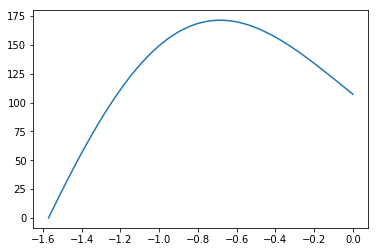

In [6]:
import matplotlib.pylab as pl
import numpy as np

beta=np.linspace(-np.pi/2, 0)
pl.plot(beta, [pm.torque_iqd(*femagtools.machine.iqd(b, 80)) for b in beta])
pl.show()

Calculate the amplitude of the phase voltage at frequency 75 Hz:

In [7]:
import numpy as np
f1 = 75
w1 = 2*np.pi*f1
np.linalg.norm(pm.uqd(w1, 87.16183261, -71.16228193))

165.10379403723468

Find the frequency from maximum torque and voltage:

In [8]:
Tmax = 170.0
u1 = 230.0

w1 = pm.w1_umax(u1, *pm.iqd_torque(Tmax))
print("Frequency {}".format(w1/np.pi/2))

Frequency 150.96102105266925


Plot the speed torque characteristics:

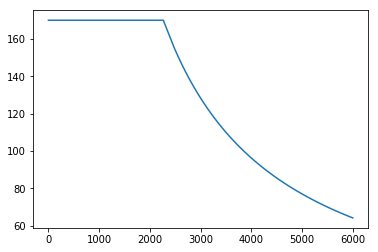

In [9]:
import matplotlib.pylab as pl

def torque(T, pmax, wm):
    """shaft torque as a function of rotor angular speed"""
    if wm <= pmax / T:
        return T
    return pmax / wm

nmax = 6000/60
pmax = w1/p*Tmax
n = np.append(np.linspace(0, w1/2/np.pi/p),
              np.linspace(1.1*w1/2/np.pi/p, nmax))

pl.plot(60*n, [torque(Tmax, pmax, 2*np.pi*nx) for nx in n])
pl.show()

Show the torque plot with the motor parameters from a Ld-Lq-Identification:

In [10]:
bch = femagtools.read_bchfile('TEST_001.BCH')
pm = femagtools.machine.create(bch, r1 = 0, ls = 0)
char = pm.characteristics(Tmax, n=4500/60, u1max=230)

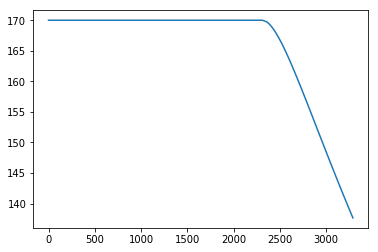

In [11]:
pl.plot([60*n for n in char['n']], char['T'])
pl.show()

Display the characteristics with a MTPA Plot:

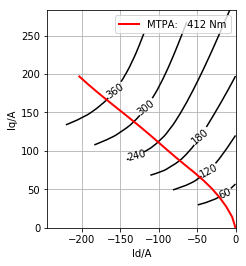

In [12]:
import femagtools.plot
femagtools.plot.mtpa(pm, bch.ldq['i1'][-1])
pl.show()

With surface

/home/tar/Documents/semafor/pres/fat-2017/femagtools-workshop/lib64/python3.4/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


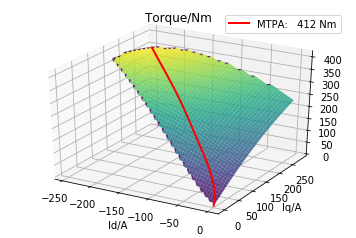

In [13]:
femagtools.plot.mtpa(pm, bch.ldq['i1'][-1], projection='3d')
pl.show()

The equivalent model can be created with parameters from a ERG file as well:

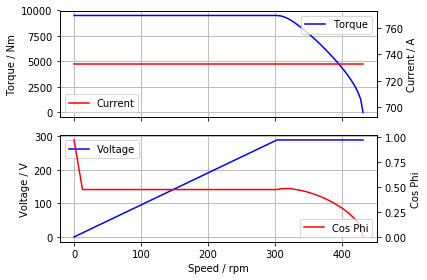

In [14]:
import femagtools.erg
erg = femagtools.erg.read('ldlq.erg')
pm = femagtools.machine.create(erg, r1 = 0, ls = 0, lfe=350)
Tmax = 9500
nmax = 600/60
u1max = 500/np.sqrt(3)
char = pm.characteristics(Tmax, n=nmax, u1max=u1max)
n = np.array(char['n'])
fig, axs = pl.subplots(2, sharex=True)

axs[0].plot(60*n, char['T'], 'b-', label='Torque')
axs[0].set_ylabel("Torque / Nm")
axs[0].grid()
axs[0].legend(loc='upper right')
ax2 = axs[0].twinx()
ax2.plot(60*n, char['i1'], 'r-', label='Current')
ax2.set_ylabel("Current / A")
ax2.legend(loc='lower left')

axs[1].plot(60*n, char['u1'], 'b-', label='Voltage')
axs[1].set_ylabel("Voltage / V",)
axs[1].set_xlabel("Speed / rpm")
axs[1].grid()
axs[1].legend(loc='upper left')
ax3 = axs[1].twinx()
ax3.plot(60*n, char['cosphi'], 'r-', label='Cos Phi')
ax3.set_ylabel("Cos Phi")
ax3.legend(loc='lower right')

fig.tight_layout()
pl.show()
